### Imports

In [17]:
import os
import shutil
import random
import torch
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision.datasets import DatasetFolder
import skimage

### Split the data to train, validation, test

In [18]:
def split_dataset(source_path, train_path, valid_path, test_path, train_file, valid_file, test_file):
    # Create train, validation, and test folders
    os.makedirs(train_path, exist_ok=True)
    os.makedirs(valid_path, exist_ok=True)
    os.makedirs(test_path, exist_ok=True)

    # Read train, validation, and test image names from respective text files
    train_filenames = read_filenames(train_file)
    valid_filenames = read_filenames(valid_file)
    test_filenames = read_filenames(test_file)

    # Copy images and masks to respective train, validation, and test folders
    for split, split_path in zip([train_filenames, valid_filenames, test_filenames], [train_path, valid_path, test_path]):
        images_path = os.path.join(split_path, "images")
        masks_path = os.path.join(split_path, "masks")
        os.makedirs(images_path, exist_ok=True)
        os.makedirs(masks_path, exist_ok=True)

        for filename in split:
            # Copy image
            src_image = os.path.join(source_path, "images", filename)
            dst_image = os.path.join(images_path, filename)
            shutil.copyfile(src_image, dst_image)

            # Copy mask
            src_mask = os.path.join(source_path, "masks", filename)
            dst_mask = os.path.join(masks_path, filename)
            shutil.copyfile(src_mask, dst_mask)


def read_filenames(filename):
    with open(filename, 'r') as file:
        filenames = file.read().splitlines()
    return filenames


# Set paths for source and split data
source_path = "data/preprocessed"
train_path = "data/splits/train"
valid_path = "data/splits/validation"
test_path = "data/splits/test"
train_file = "data/raw/metadata/training.txt"
valid_file = "data/raw/metadata/validation.txt"
test_file = "data/raw/metadata/test.txt"

split_dataset(source_path, train_path, valid_path, test_path, train_file, valid_file, test_file)


### Dataloader

In [19]:
class CustomDataset(Dataset):
    def __init__(self, root):
        self.images_path = os.path.join(root, "images")
        self.masks_path = os.path.join(root, "masks")
        self.filenames = os.listdir(self.images_path)
        self.transform = transforms.ToTensor()

    def __len__(self):
        return len(self.filenames)

    def __getitem__(self, idx):
        filename = self.filenames[idx]
        image = skimage.io.imread(os.path.join(self.images_path, filename))
        mask = skimage.io.imread(os.path.join(self.masks_path, filename))
        image = self.transform(image)
        mask = self.transform(mask)
        return image, mask

Size: 100
torch.Size([3, 520, 696]) torch.Size([3, 520, 696])


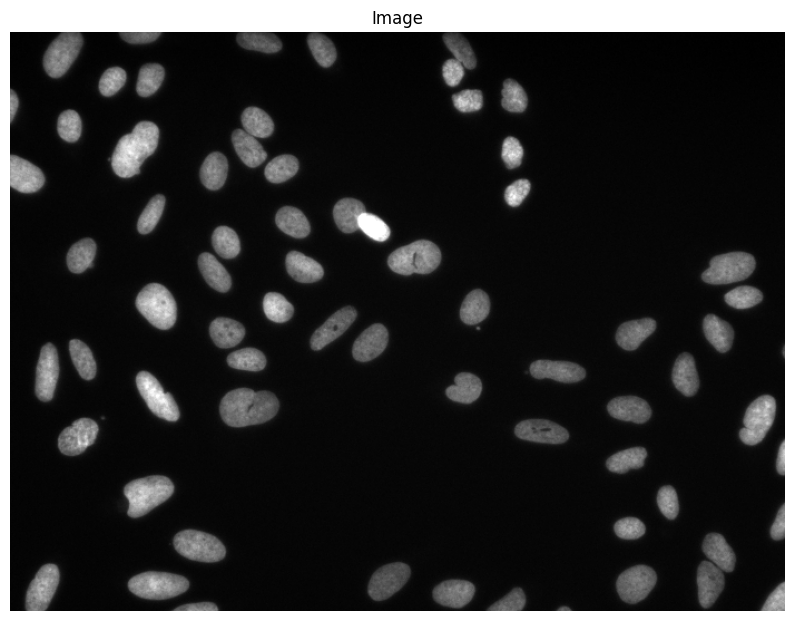

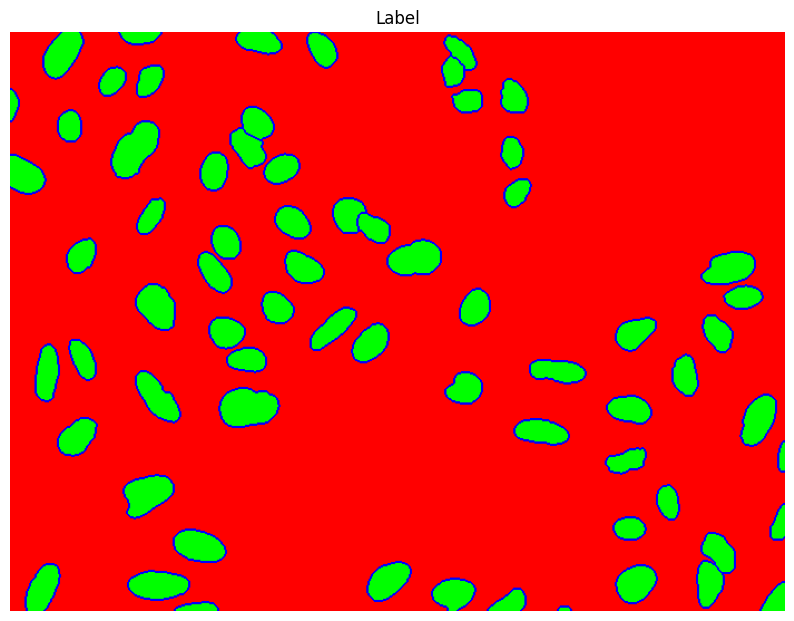

In [25]:
import matplotlib.pylab as plt
import numpy as np

train_dataset = CustomDataset(train_path)
size = len(train_dataset)
img, label = train_dataset[0]

print('Size:', size)
print(label.shape , img.shape)

plt.figure(figsize=(10, 10))
plt.imshow(np.transpose(img, (1, 2, 0)))
plt.title('Image')
plt.axis('off')
plt.show()


plt.figure(figsize=(10, 10))
plt.imshow(label.numpy().transpose(1, 2, 0))
plt.title('Label')
plt.axis('off')
plt.show()